In [4]:
setwd("C:/Users/DJ COMPUTERS/OneDrive/Desktop/WEB- APP")
## Loading Libraries
library(ggplot2)
library(lubridate)
library(moments)
library(car)
library(lmtest)
library(sandwich)
library(graphics)
library(caret)
library(Metrics)
library(patchwork)
library(gridExtra)
library(grid)
library(dplyr)
library(tidyr)

In [6]:
## Data Collection
library(readr)
Weather_dataset_1_ <- read_csv("Weather_dataset-_1_.csv")
states <- read_csv("weather_data_states.csv")
cities <- read_csv("weather_data (1).csv")

New names:
• `` -> `...7`
• `` -> `...8`
Rows: 999 Columns: 8
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Date, Description
dbl (4): Min Temperature, Max Temperature, Wind speed, Average Temp
lgl (2): ...7, ...8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): State, Capital
dbl (1): Temperature

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 123 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): City, Temp

DATA CLEANING

In [8]:
# for model dataset
model <- Weather_dataset_1_[c(1:538),-c(7,8)]
head(model,10)
# if any NA
sum(is.na(model))
model <- na.omit(model)
colnames(model)
cat("Total rows x column :",dim(model))
# renaming the column names 
colnames(model) <- c("Date","Min_Temp","Max_Temp","Status","Avg_Temp","Wind")
# printing the column names
colnames(model)
# formatting into date type
model$Date <- dmy(model$Date)  # For "dd-mm-yyyy" or "dd/mm/yyyy"


Date,Min Temperature,Max Temperature,Description,Wind speed,Average Temp
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
01/08/2023,25,29,Moderate or heavy rain,16.75,27.0
02/08/2023,24,28,Moderate or heavy rain,16.75,26.0
03/08/2023,23,25,Moderate or heavy rain,21.00,24.0
04/08/2023,23,27,Patchy rain possible,17.12,25.0
05/08/2023,23,31,Patchy rain possible,16.62,27.0
06/08/2023,24,29,Patchy rain possible,16.67,26.5
07/08/2023,24,30,Patchy rain possible,14.12,27.0
08/08/2023,23,30,Patchy rain possible,19.37,26.5
09/08/2023,24,30,Patchy rain possible,16.62,27.0


[1] 0

[1] "Date"            "Min Temperature" "Max Temperature" "Description"    
[5] "Wind speed"      "Average Temp"

Total rows x column : 538 6

[1] "Date"     "Min_Temp" "Max_Temp" "Status"   "Avg_Temp" "Wind"

In [12]:
# for states data 
head(states,10)
#checking NA observations
sum(is.na(states))
states <- na.omit(states)
cat("Total rows x column :",dim(states))
#renaming the coluumn names
colnames(states) <- c("State","Temp(C)","Capital")
#printing column names
colnames(states)
# since the capital column is redundant
states <- cbind.data.frame(states$State,states$`Temp(C)`)
colnames(states) <- c("State","Temp(C)")
head(states)


State,Temp(C),Capital
<chr>,<dbl>,<chr>
india/Andhra-Pradesh,29,Visakhapatnam
india/Arunachal-Pradesh,24,Itanagar
india/Assam,24,Dispur
india/Bihar,21,Patna
india/Chhattisgarh,26,Raipur
india/Goa,31,Panaji
india/Gujarat,28,Ahmedabad
india/Haryana,21,Gurgaon
india/Himachal-Pradesh,20,Shimla


[1] 0

Total rows x column : 35 3

[1] "State"   "Temp(C)" "Capital"

,State,Temp(C)
,<chr>,<dbl>
1,india/Andhra-Pradesh,29
2,india/Arunachal-Pradesh,24
3,india/Assam,24
4,india/Bihar,21
5,india/Chhattisgarh,26
6,india/Goa,31


In [14]:
# for cities
head(cities,10)
#checking NA observations
sum(is.na(cities))
cities <- na.omit(cities)
cat("Total rows x column :",dim(cities))
#renaming the column names
colnames(cities) <- c("City","Temp(C)","Description")
#printing column names
colnames(cities)
#cleaning datasets
table(cities$Description)
cities <- cities[cities$Description!="Imphal",]
cities <- cities[cities$Description!= "Panaji",]


City,Temperature,Description
<chr>,<chr>,<chr>
india/Mumbai,30,Haze.
india/Delhi,21,Sunny.
india/Bangalore,26,Passing clouds.
india/Kolkata,24,Haze.
india/Chennai,29,Broken clouds.
india/Hyderabad,29,Clear.
india/Pune,27,Sunny.
india/Ahmadabad,28,Clear.
india/Surat,28,Clear.


[1] 0

Total rows x column : 123 3

[1] "City"        "Temp(C)"     "Description"


   Broken clouds.            Clear.              Fog.             Haze. 
                1                12                 4                23 
           Imphal         Overcast.            Panaji     Partly sunny. 
                1                 3                 1                11 
  Passing clouds. Scattered clouds.            Sunny. 
                2                21                44 

 Exploratory Data Analysis

In [17]:
# summary statistics and structure of datasets#
#model
summary(model)
str(model)
table(model$Status)
 
#states
summary(states)
str(states)

#cities
summary(cities)
str(cities)
cities$`Temp(C)`<- as.numeric(cities$`Temp(C)`)
table(cities$Description)


      Date               Min_Temp        Max_Temp        Status         
 Min.   :2023-08-01   Min.   : 7.00   Min.   : 3.00   Length:538        
 1st Qu.:2023-12-13   1st Qu.:18.00   1st Qu.:29.00   Class :character  
 Median :2024-04-25   Median :23.00   Median :31.00   Mode  :character  
 Mean   :2024-04-25   Mean   :21.49   Mean   :32.24                     
 3rd Qu.:2024-09-06   3rd Qu.:24.00   3rd Qu.:34.00                     
 Max.   :2025-01-19   Max.   :35.00   Max.   :46.00                     
    Avg_Temp          Wind      
 Min.   : 3.00   Min.   :15.50  
 1st Qu.: 7.50   1st Qu.:24.00  
 Median : 9.62   Median :26.50  
 Mean   :10.47   Mean   :26.86  
 3rd Qu.:12.62   3rd Qu.:29.00  
 Max.   :30.75   Max.   :40.50  

tibble [538 × 6] (S3: tbl_df/tbl/data.frame)
 $ Date    : Date[1:538], format: "2023-08-01" "2023-08-02" ...
 $ Min_Temp: num [1:538] 25 24 23 23 23 24 24 23 24 24 ...
 $ Max_Temp: num [1:538] 29 28 25 27 31 29 30 30 30 31 ...
 $ Status  : chr [1:538] "Moderate or heavy rain" "Moderate or heavy rain" "Moderate or heavy rain" "Patchy rain possible" ...
 $ Avg_Temp: num [1:538] 16.8 16.8 21 17.1 16.6 ...
 $ Wind    : num [1:538] 27 26 24 25 27 26.5 27 26.5 27 27.5 ...



                Cloudy           light drizze Moderate or heavy rain 
                    10                     18                     25 
         Moderate rain          Partly cloudy   Patchy rain possible 
                    14                     53                    104 
               showers                  Sunny           Thunderstorm 
                    61                    234                     19 

    State              Temp(C)     
 Length:35          Min.   : 7.00  
 Class :character   1st Qu.:21.00  
 Mode  :character   Median :24.00  
                    Mean   :23.74  
                    3rd Qu.:28.00  
                    Max.   :33.00  

'data.frame':	35 obs. of  2 variables:
 $ State  : chr  "india/Andhra-Pradesh" "india/Arunachal-Pradesh" "india/Assam" "india/Bihar" ...
 $ Temp(C): num  29 24 24 21 26 31 28 21 20 16 ...


     City             Temp(C)          Description       
 Length:121         Length:121         Length:121        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  

tibble [121 × 3] (S3: tbl_df/tbl/data.frame)
 $ City       : chr [1:121] "india/Mumbai" "india/Delhi" "india/Bangalore" "india/Kolkata" ...
 $ Temp(C)    : chr [1:121] "30" "21" "26" "24" ...
 $ Description: chr [1:121] "Haze." "Sunny." "Passing clouds." "Haze." ...


Warning message:
"NAs introduced by coercion"



   Broken clouds.            Clear.              Fog.             Haze. 
                1                12                 4                23 
        Overcast.     Partly sunny.   Passing clouds. Scattered clouds. 
                3                11                 2                21 
           Sunny. 
               44 

Data Visualization

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


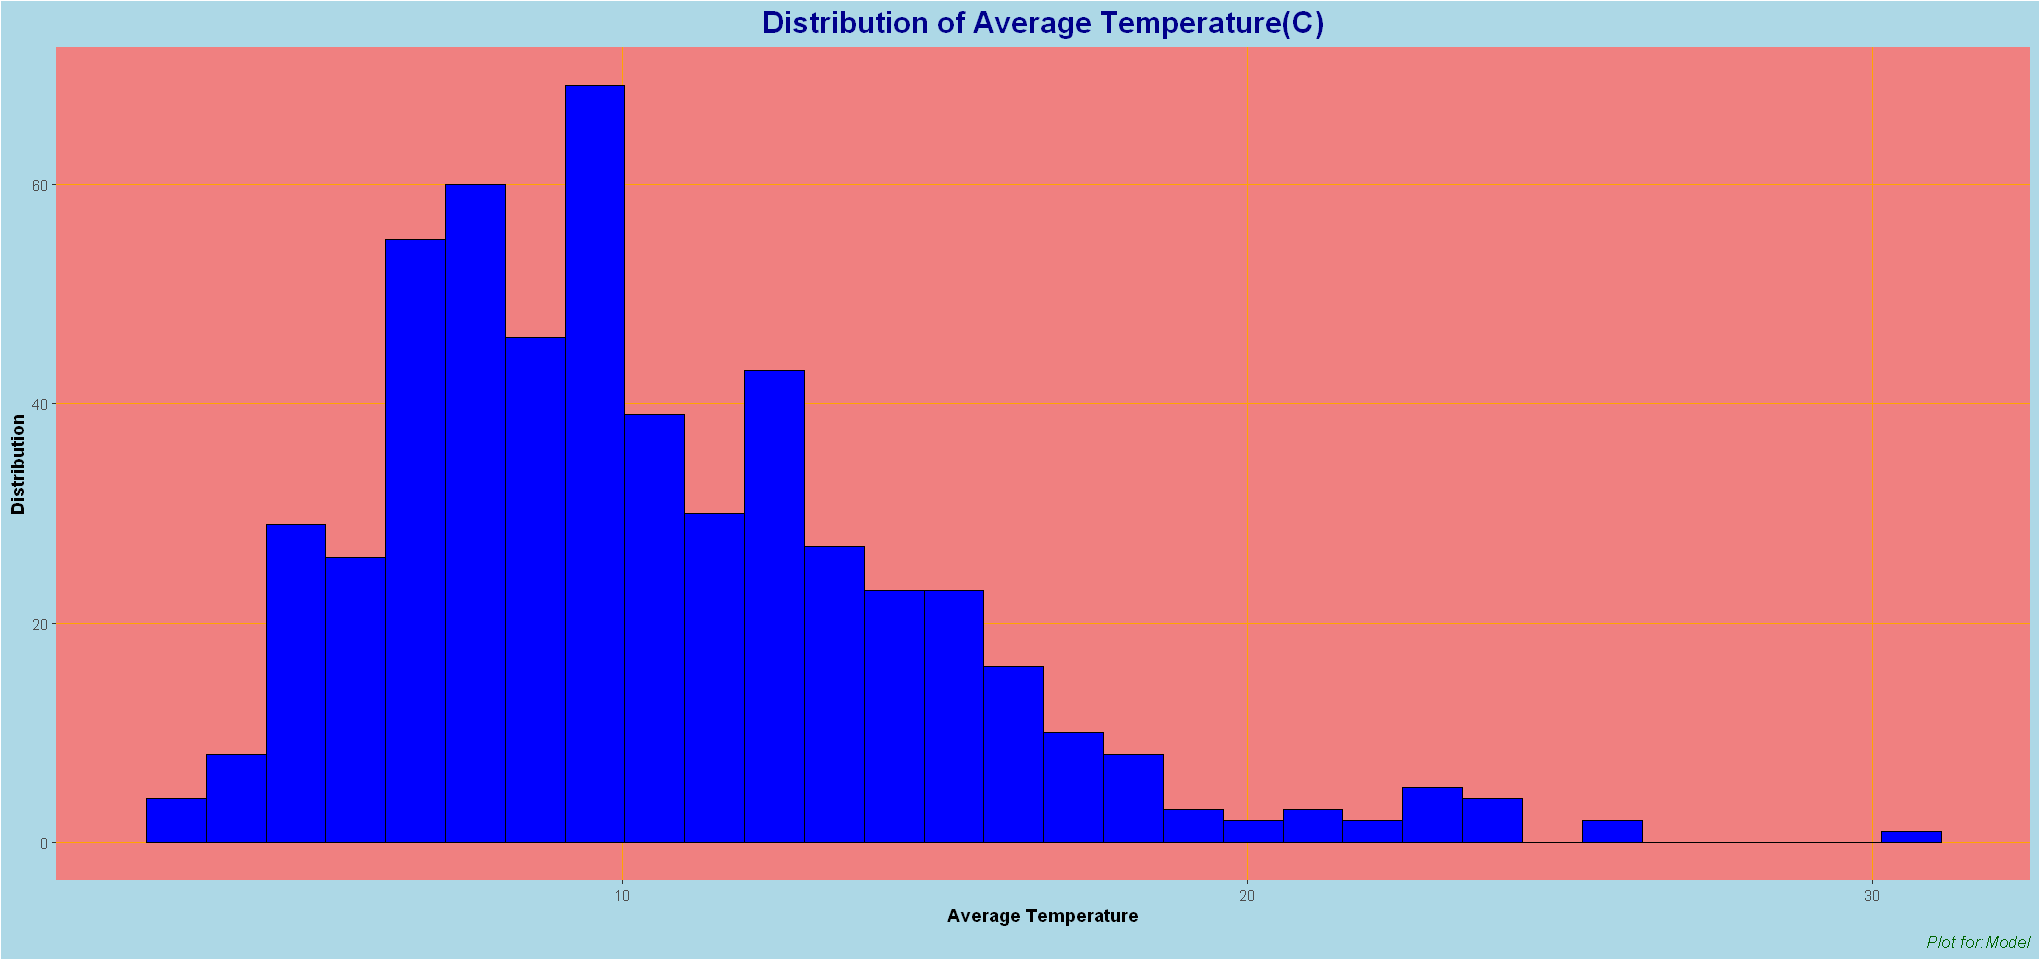

In [40]:

#model
options(repr.plot.width=17, repr.plot.height=8)
ggplot(model,aes(Avg_Temp))+geom_histogram(fill = "blue",col = "black")+
  labs(x = "Average Temperature",y = "Distribution",
       title="Distribution of Average Temperature(C)",
       caption ="Plot for:Model")+theme(
    plot.title = element_text(face = "bold", size = 18, hjust = 0.5, color = "darkblue"), # Center and style title
    plot.subtitle = element_text(size = 14, hjust = 0.5, color = "gray30"), # Style subtitle
    plot.caption = element_text(size = 10, face = "italic", color = "darkgreen"), # Style caption
    axis.title = element_text(face = "bold"), # Bold axis titles
    panel.grid.major = element_line(color = "orange"), # Light grid lines
    panel.grid.minor = element_blank(),# Remove minor grid lines
    plot.background = element_rect(fill = "lightblue"),
    panel.background = element_rect(fill = "lightcoral")
    )

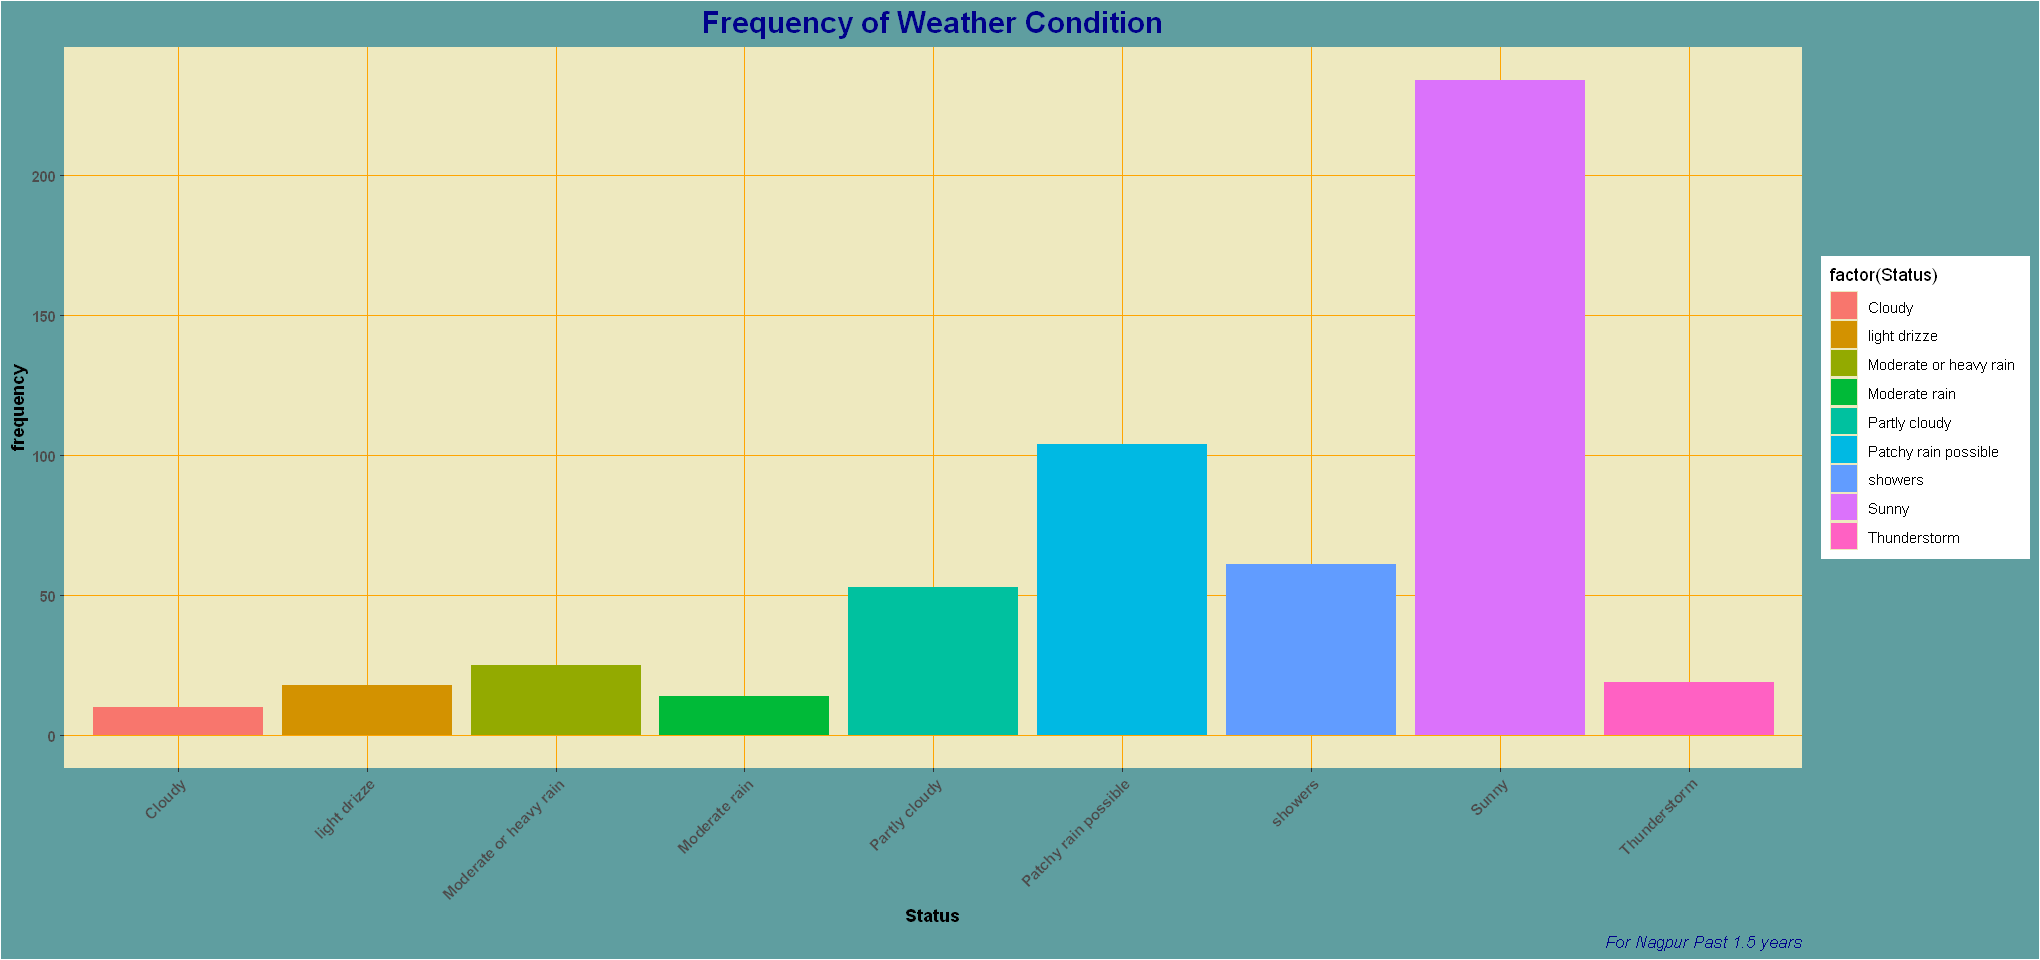

In [38]:
options(repr.plot.width=17, repr.plot.height=8)
ggplot(model,aes(x = Status,fill = factor(Status)))+geom_bar()+
  labs(title = "Frequency of Weather Condition",
        x = "Status",y = "frequency",
        caption = "For Nagpur Past 1.5 years")+
  theme(
    plot.title = element_text(face = "bold", size = 18, hjust = 0.5, color = "darkblue"), # Center and style title
    plot.subtitle = element_text(size = 14, hjust = 0.5, color = "gray30"), # Style subtitle
    plot.caption = element_text(size = 10, face = "italic", color = "darkblue"), # Style caption
    axis.title = element_text(face = "bold"), # Bold axis titles
    axis.text.x = element_text(face = "bold", angle = 45, hjust = 1),  # Bold and rotate x-axis labels
    axis.text.y = element_text(face = "bold"),  # Bold y-axis labels
    panel.grid.major = element_line(color = "orange"), # Light grid lines
    panel.grid.minor = element_blank(),# Remove minor grid lines
    plot.background = element_rect(fill = "cadetblue"),
    panel.background = element_rect(fill = "lemonchiffon2")
     )

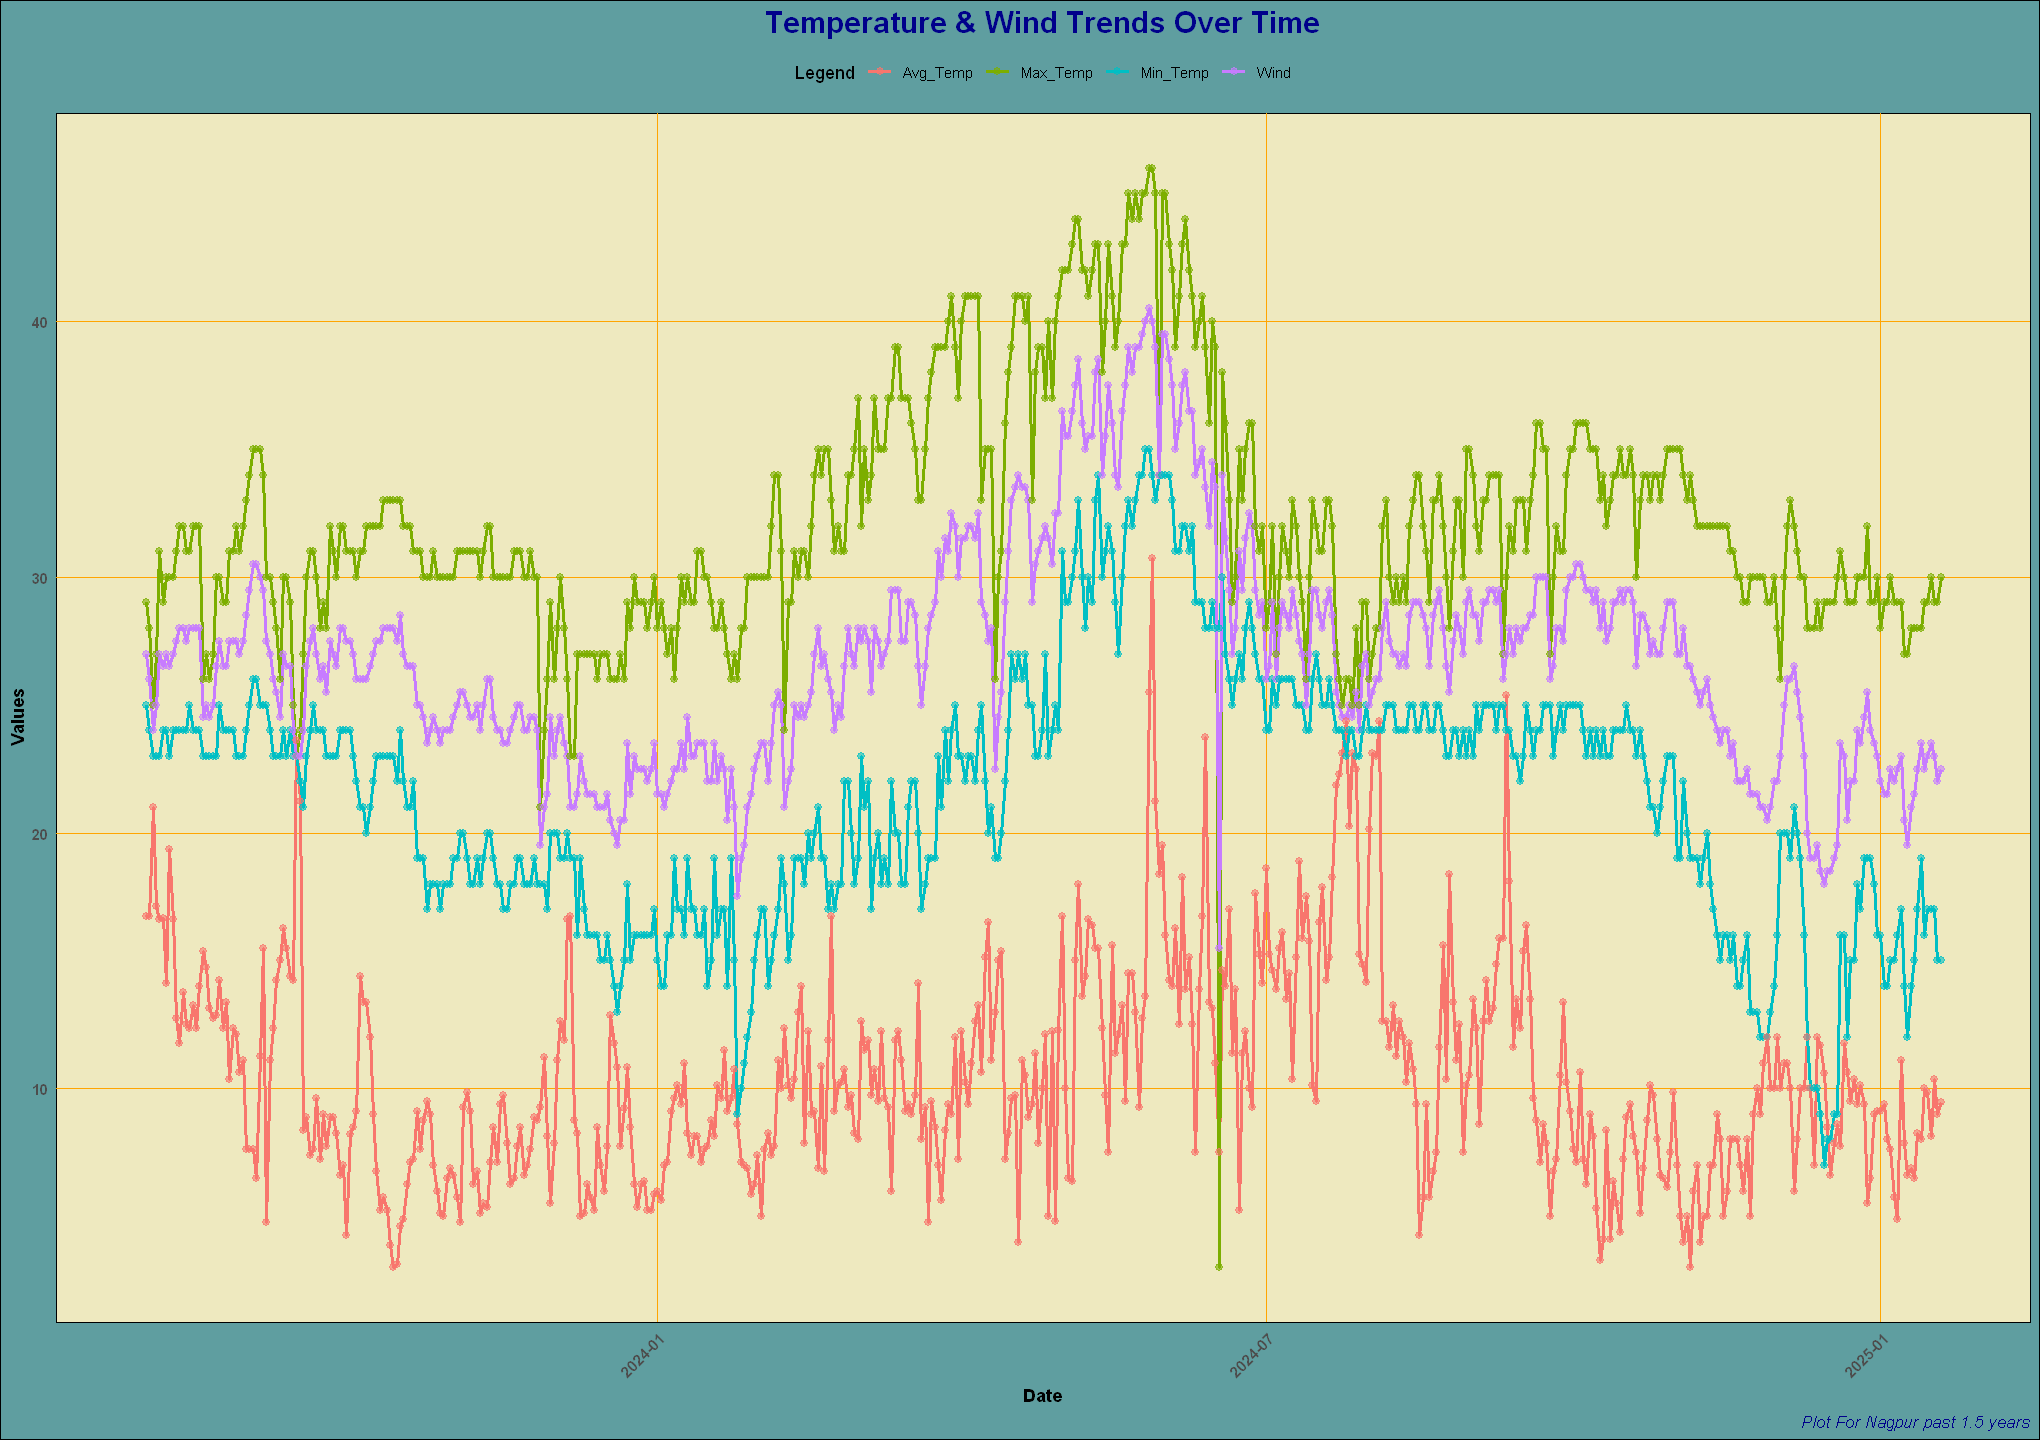

In [36]:
options(repr.plot.width=17, repr.plot.height=12)
# Reshape the data to long format for ggplot
model_long <- model %>%
  pivot_longer(cols = c(`Min_Temp`, `Max_Temp`, `Wind`, `Avg_Temp`), 
               names_to = "Variable", 
               values_to = "Value")
# Create the line plot
ggplot(model_long, aes(x = Date, y = Value, color = Variable, group = Variable)) +
  geom_line(size = 1) +
  geom_point(size = 2, alpha = 0.6) +  # Add points for better visibility
  labs(title = "Temperature & Wind Trends Over Time",
       x = "Date",
       y = "Values",
       color = "Legend",caption= "Plot For Nagpur past 1.5 years") +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 18, hjust = 0.5, color = "darkblue"), # Center and style title
    plot.subtitle = element_text(size = 14, hjust = 0.5, color = "gray30"), # Style subtitle
    plot.caption = element_text(size = 10, face = "italic", color = "darkblue"), # Style caption
    axis.title = element_text(face = "bold"), # Bold axis titles
    axis.text.x = element_text(face = "bold", angle = 45, hjust = 1),  # Bold and rotate x-axis labels
    axis.text.y = element_text(face = "bold"),  # Bold y-axis labels
    panel.grid.major = element_line(color = "orange"), # Light grid lines
    panel.grid.minor = element_blank(),# Remove minor grid lines
    plot.background = element_rect(fill = "cadetblue"),
    panel.background = element_rect(fill = "lemonchiffon2"),
    legend.position = "top"
  )

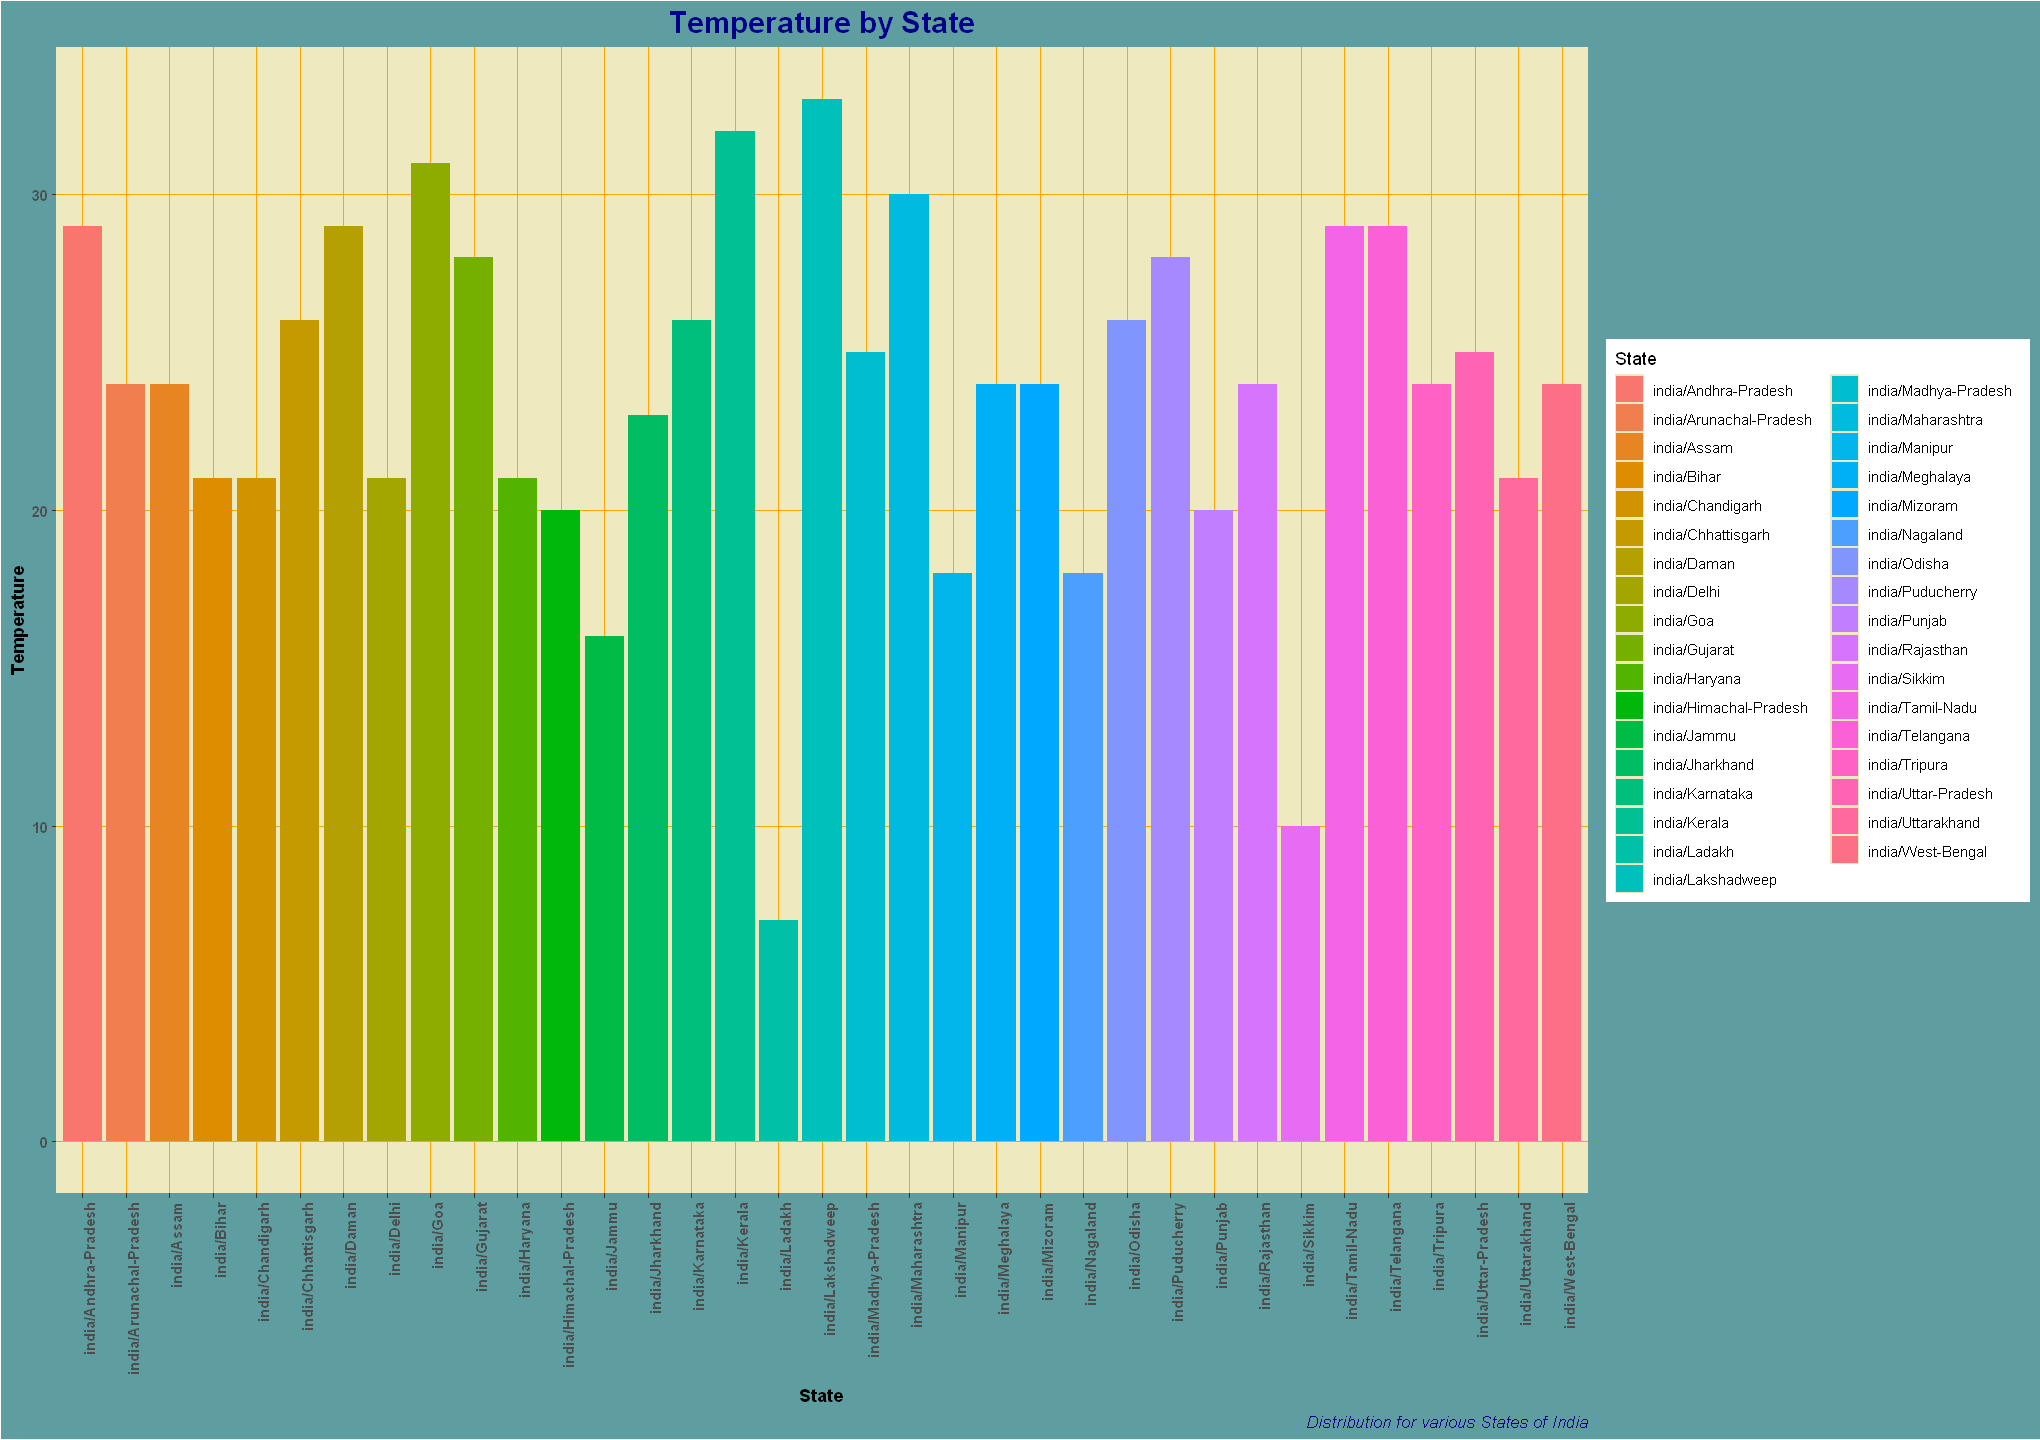

In [42]:
options(repr.plot.width=17, repr.plot.height=12)
# states
ggplot(states, aes(x = State, y = `Temp(C)`, fill = State)) +
  geom_bar(stat = "identity") +
  labs(title = "Temperature by State", x = "State", y = "Temperature",
       caption = "Distribution for various States of India")+
  theme(
    plot.title = element_text(face = "bold", size = 18, hjust = 0.5, color = "darkblue"), # Center and style title
    plot.subtitle = element_text(size = 14, hjust = 0.5, color = "gray30"), # Style subtitle
    plot.caption = element_text(size = 10, face = "italic", color = "darkblue"), # Style caption
    axis.title = element_text(face = "bold"), # Bold axis titles
    axis.text.x = element_text(face = "bold", angle = 90, hjust = 1),  # Bold and rotate x-axis labels
    axis.text.y = element_text(face = "bold"),  # Bold y-axis labels
    panel.grid.major = element_line(color = "orange"), # Light grid lines
    panel.grid.minor = element_blank(),# Remove minor grid lines
    plot.background = element_rect(fill = "cadetblue"),
    panel.background = element_rect(fill = "lemonchiffon2")
  )


Warning message in plot_theme(plot):
"The `plot.backround` theme element is not defined in the element hierarchy."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range (`geom_line()`)."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range (`geom_point()`)."


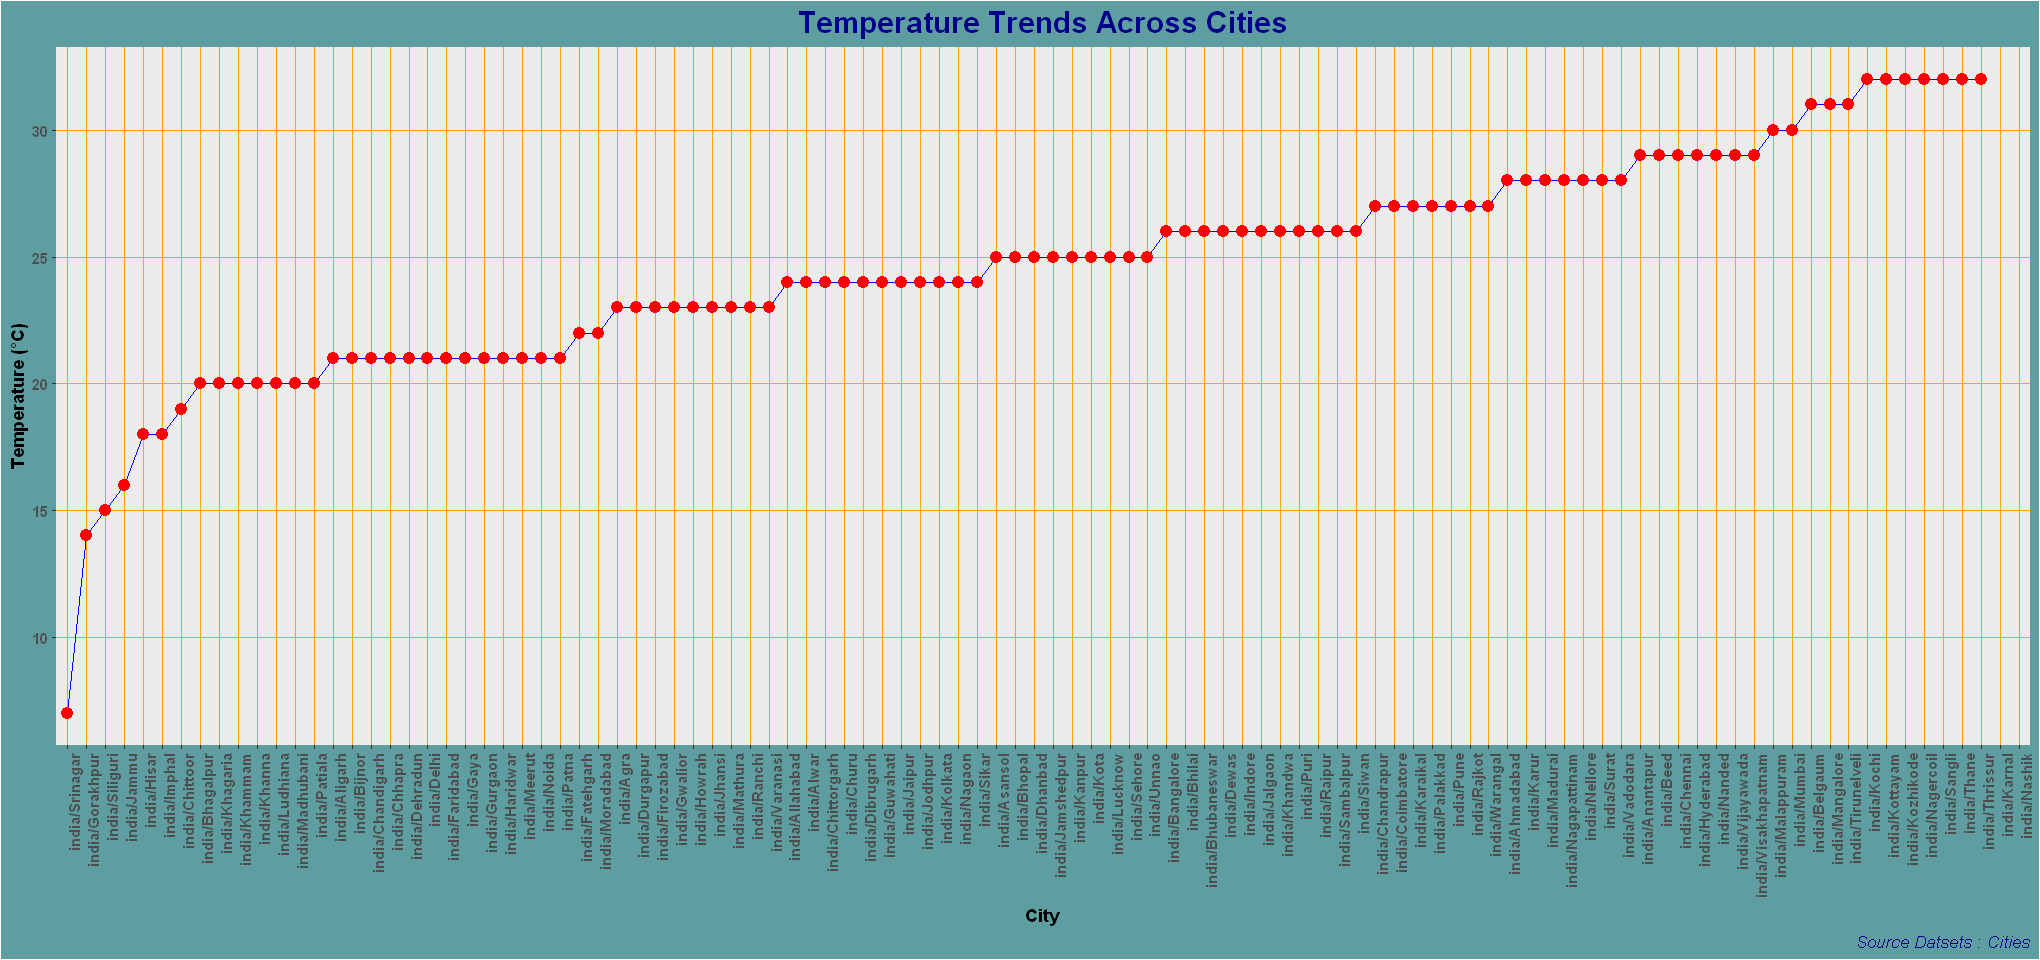

In [46]:
options(repr.plot.width=17, repr.plot.height=8)
#cities
ggplot(cities, aes(x = reorder(City, `Temp(C)`), y = `Temp(C)`, group = 1)) +
  geom_line(color = "blue") +
  geom_point(size = 3, color = "red") +
  labs(title = "Temperature Trends Across Cities", x = "City", y = "Temperature (°C)",
       caption = "Source Datsets : Cities")+
  theme(
    plot.title = element_text(face = "bold", size = 18, hjust = 0.5, color = "darkblue"), # Center and style title
    plot.subtitle = element_text(size = 14, hjust = 0.5, color = "gray30"), # Style subtitle
    plot.caption = element_text(size = 10, face = "italic", color = "darkblue"), # Style caption
    axis.title = element_text(face = "bold"), # Bold axis titles
    axis.text.x = element_text(face = "bold", angle = 90, hjust = 1),  # Bold and rotate x-axis labels
    axis.text.y = element_text(face = "bold"),  # Bold y-axis labels
    panel.grid.major = element_line(color = "orange"), # Light grid lines
    panel.grid.minor = element_blank(),# Remove minor grid lines
    plot.background = element_rect(fill = "cadetblue"),
    plot.backround = element_rect(fill = "lightcoral")
  )

TEAM HAWKS